In [1]:
import sys
from os import getcwd
import os
from os.path import basename, dirname
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import torch
from scipy import stats
import random
import statsmodels
from statsmodels.tsa.seasonal import STL
from statsmodels.tools.eval_measures import rmse
import yfinance as yf
import argparse
import sys



/home/lirannoc/.conda/envs/da/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import darts
from darts.models import NBEATSModel,BlockRNNModel,RNNModel,ExponentialSmoothing, TCNModel, TransformerModel
from statsmodels.tsa.seasonal import STL
from darts.utils.data import TrainingDataset, PastCovariatesTrainingDataset
from darts.utils.data import PastCovariatesInferenceDataset
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
from darts.datasets import AirPassengersDataset, AusBeerDataset
from darts.dataprocessing.transformers.boxcox import BoxCox

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

import da_transformations as da
import da_forecasting
from da_datasets import UnivariateDataset, get_dataset



In [3]:
seed = np.random.randint(low = 0,high = 1000)
print(seed)

datasets = ['AusBeer']
data, seasonality = get_dataset(datasets[0]) 

models = ['RNN','N-BEATS-G','N-BEATS-I','TRANSFORMER','TCN']
#models = ['TCN']
split = 0.7
reps = 1
inlen = 12
outlen = 6

432


## Baseline

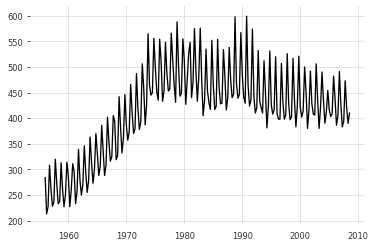

In [4]:
plt.plot(data)
plt.show()

2022-07-27 15:42:24 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:42:24 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:42:24 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:42:24 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:42:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:42:26 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:42:26 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 5/5 [00:00<00:00, 155.71it/s, loss=0.0024, train_loss=0.00192]  


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


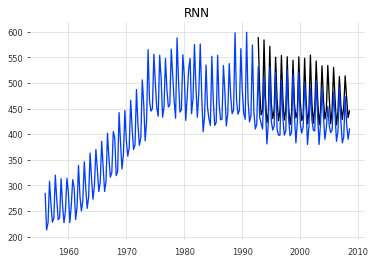

2022-07-27 15:42:34 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:42:34 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:42:34 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:42:34 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:42:34 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:42:34 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 199: 100%|██████████| 5/5 [00:00<00:00, 50.73it/s, loss=0.00304, train_loss=0.0026]  


2022-07-27 15:42:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]

2022-07-27 15:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


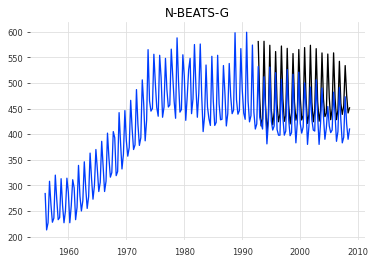

2022-07-27 15:43:02 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:43:02 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:43:02 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:43:02 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:43:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:43:02 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:43:02 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.6 M 


Epoch 199: 100%|██████████| 5/5 [00:00<00:00, 103.01it/s, loss=0.00145, train_loss=0.000954]


2022-07-27 15:43:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]

2022-07-27 15:43:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:43:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


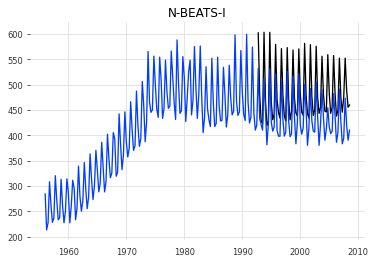

2022-07-27 15:43:14 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:43:14 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:43:14 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:43:14 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:43:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:43:14 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:43:14 pytorch_lightning.callbacks.model_summary INFO: 
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3

Epoch 199: 100%|██████████| 5/5 [00:00<00:00, 76.68it/s, loss=0.00303, train_loss=0.00281] 


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]

2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]

2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


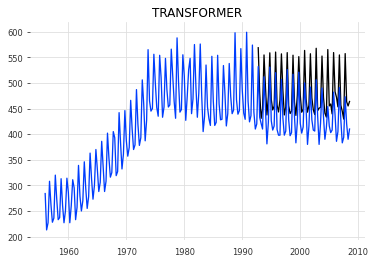

2022-07-27 15:43:29 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-27 15:43:29 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:43:29 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:43:29 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:43:29 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:43:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:43:29 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:43:29 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     


Epoch 199: 100%|██████████| 5/5 [00:00<00:00, 138.14it/s, loss=0.00951, train_loss=0.0125] 


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]

2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]

2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]

2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]

2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]

2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]

2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


2022-07-27 15:43:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 5it [00:00, ?it/s]


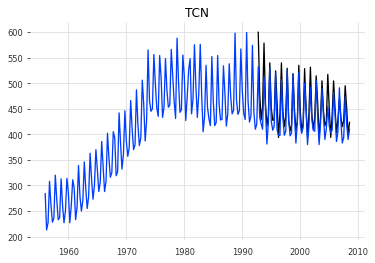

Dataset        Model avg MAPE avg RMSE avg sMAPE std MAPE std RMSE  \
0  AusBeer          RNN    8.499   39.124     8.111      0.0      0.0   
0  AusBeer    N-BEATS-G    9.054   43.807     8.594      0.0      0.0   
0  AusBeer    N-BEATS-I   11.187   53.013    10.511      0.0      0.0   
0  AusBeer  TRANSFORMER   10.849   49.793    10.217      0.0      0.0   
0  AusBeer          TCN      4.8     26.0     4.636      0.0      0.0   

  std sMAPE n ops mag op prob  
0       0.0     0  []      []  
0       0.0     0  []      []  
0       0.0     0  []      []  
0       0.0     0  []      []  
0       0.0     0  []      []

In [5]:

aug_n = 0 # number of operations
aug_m = [] # magnitude per operation
aug_p = [] # probability density function for the transformations
baseline_result  = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed = seed)      
baseline_result


# Identity

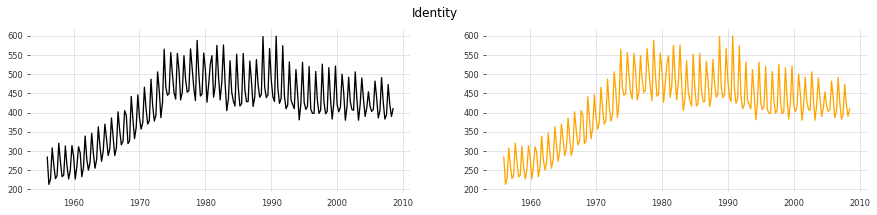

In [6]:
da.plot_augmentation(data,seasonality,"Identity")

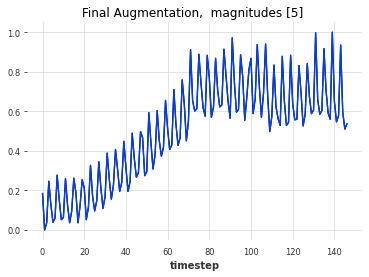

2022-07-27 15:43:39 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:43:39 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:43:39 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:43:39 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:43:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:43:39 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:43:39 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 141.16it/s, loss=0.00181, train_loss=0.000706]


2022-07-27 15:43:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:43:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


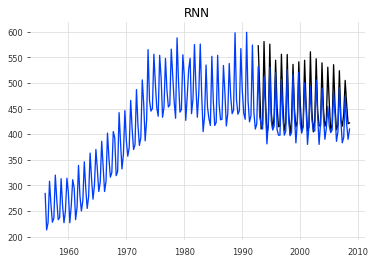

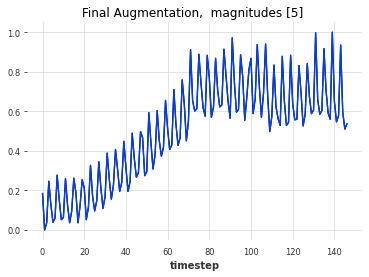

2022-07-27 15:43:53 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:43:53 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:43:53 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:43:53 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:43:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:43:53 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:43:53 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 42.05it/s, loss=0.000703, train_loss=0.00132] 


2022-07-27 15:44:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:44:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:44:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:44:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:44:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


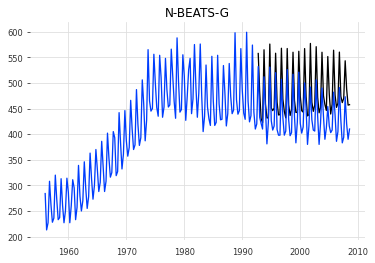

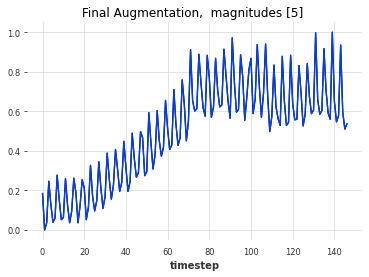

2022-07-27 15:44:47 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:44:47 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:44:47 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:44:47 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:44:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:44:47 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:44:47 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.6 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 88.51it/s, loss=0.000416, train_loss=0.000322]


2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


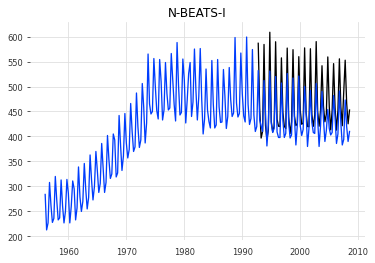

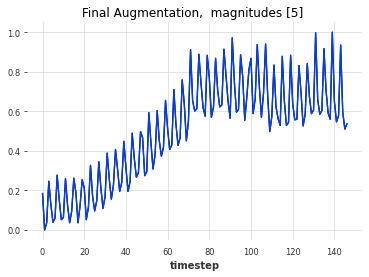

2022-07-27 15:45:11 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:45:11 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:45:11 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:45:11 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:45:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:45:11 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:45:11 pytorch_lightning.callbacks.model_summary INFO: 
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3

Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 68.77it/s, loss=0.00134, train_loss=0.00198] 


2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


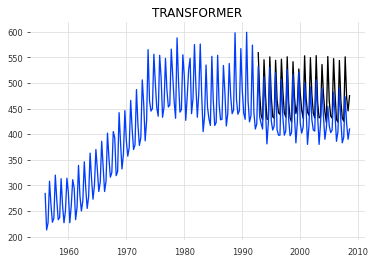

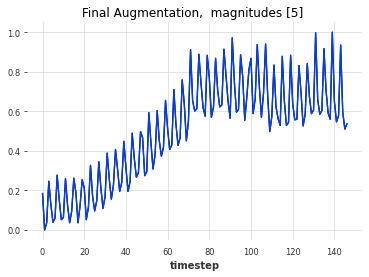

2022-07-27 15:45:40 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-27 15:45:40 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:45:40 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:45:40 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:45:40 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:45:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:45:40 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:45:40 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 125.20it/s, loss=0.00967, train_loss=0.00905]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:45:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


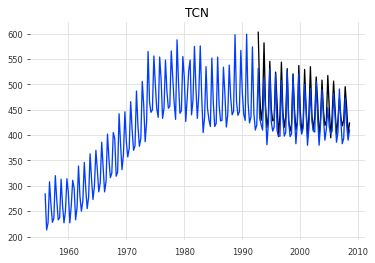

Dataset        Model avg MAPE avg RMSE avg sMAPE std MAPE std RMSE  \
0  AusBeer          RNN    5.557   30.535      5.34      0.0      0.0   
0  AusBeer    N-BEATS-G   10.752    50.19    10.117      0.0      0.0   
0  AusBeer    N-BEATS-I    7.846   43.187     7.438      0.0      0.0   
0  AusBeer  TRANSFORMER    8.955   42.264     8.495      0.0      0.0   
0  AusBeer          TCN    5.152   27.511     4.968      0.0      0.0   

  std sMAPE n ops  mag                                           op prob  
0       0.0     1  [5]  [array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [5]  [array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [5]  [array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [5]  [array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [5]  [array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

In [7]:

aug_n = 1
aug_m = [5]
aug_p = [(np.array(list(da.ranges.keys()))=='Identity').astype(int)]
iden_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed=seed)
iden_results

# Jittering

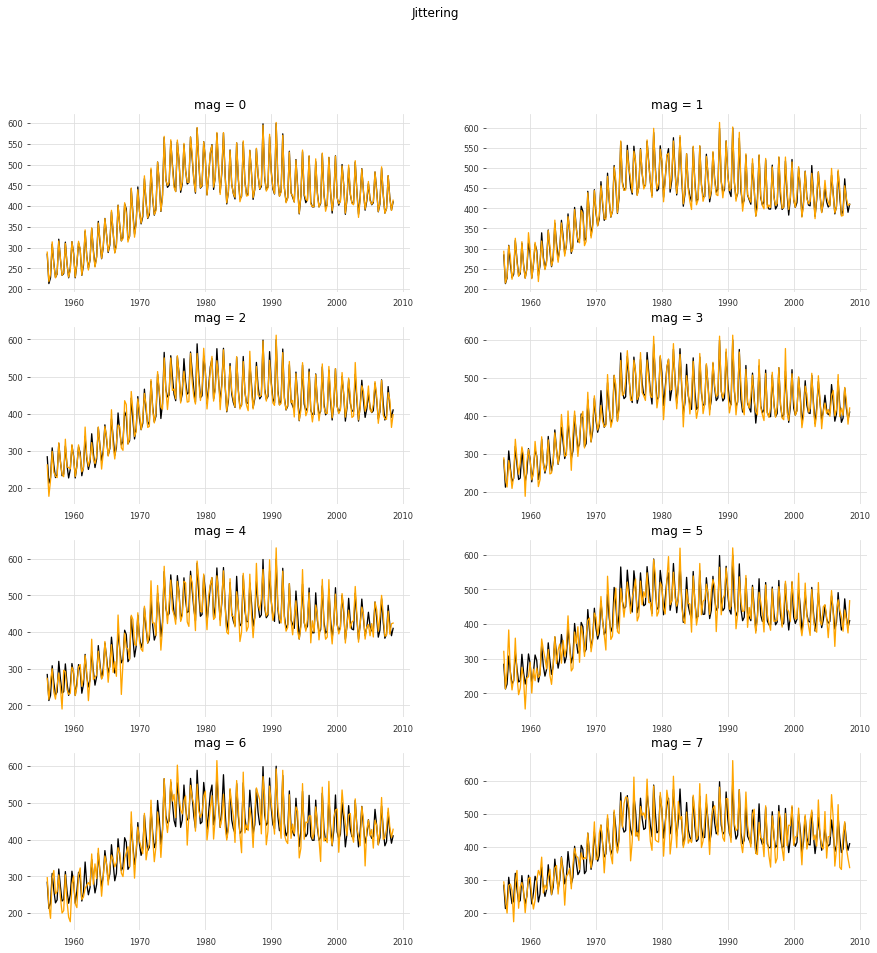

In [8]:
da.plot_augmentation(data,seasonality,"Jittering")

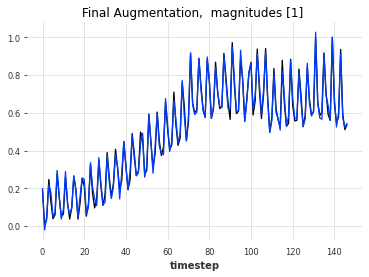

2022-07-27 15:45:58 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:45:58 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:45:58 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:45:58 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:45:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:45:58 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:45:58 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 131.26it/s, loss=0.00228, train_loss=0.00215] 


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:46:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:46:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


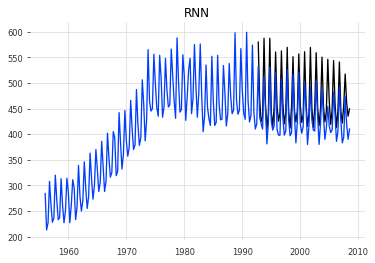

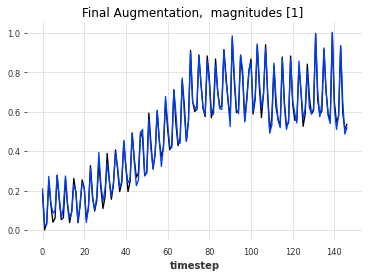

2022-07-27 15:46:12 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:46:12 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:46:12 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:46:12 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:46:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:46:12 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:46:12 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 46.12it/s, loss=0.00154, train_loss=0.00251]  


2022-07-27 15:46:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:46:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:46:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


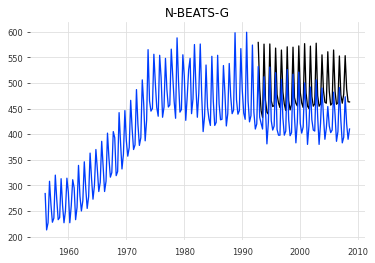

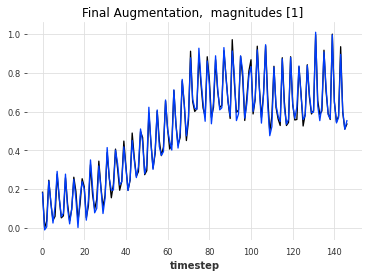

2022-07-27 15:47:02 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:47:02 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:47:02 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:47:02 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:47:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:47:02 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:47:02 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.6 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 83.64it/s, loss=0.00114, train_loss=0.000424] 


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


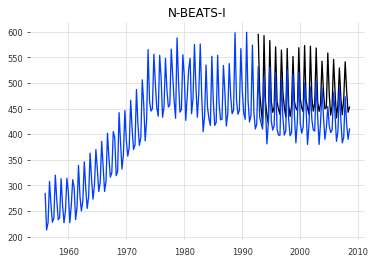

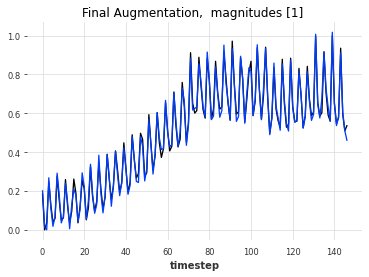

2022-07-27 15:47:26 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:47:26 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:47:26 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:47:26 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:47:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:47:26 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:47:26 pytorch_lightning.callbacks.model_summary INFO: 
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3

Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 71.41it/s, loss=0.00137, train_loss=0.00128] 


2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:47:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:47:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


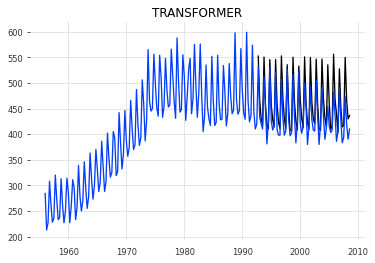

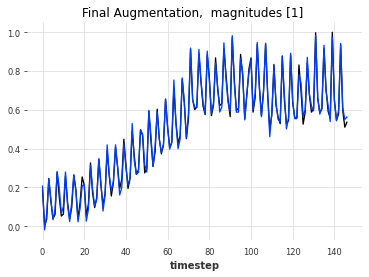

2022-07-27 15:47:55 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-27 15:47:55 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:47:55 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:47:55 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:47:55 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:47:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:47:55 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:47:55 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 112.99it/s, loss=0.00996, train_loss=0.00855]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


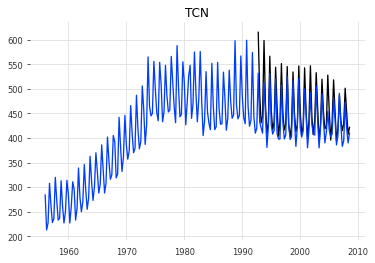

Dataset        Model avg MAPE avg RMSE avg sMAPE std MAPE std RMSE  \
0  AusBeer          RNN    8.036   39.572     7.662      0.0      0.0   
0  AusBeer    N-BEATS-G   12.715   57.372    11.878      0.0      0.0   
0  AusBeer    N-BEATS-I   10.928   50.521     10.29      0.0      0.0   
0  AusBeer  TRANSFORMER    6.484   33.885     6.207      0.0      0.0   
0  AusBeer          TCN    5.521   30.437     5.309      0.0      0.0   

  std sMAPE n ops  mag                                           op prob  
0       0.0     1  [1]  [array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [1]  [array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [1]  [array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [1]  [array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [1]  [array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

In [9]:

aug_n = 1
aug_m = [1]
aug_p = [(np.array(list(da.ranges.keys()))=='Jittering').astype(int)]
jitter_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed = seed) 
jitter_results

# Flip

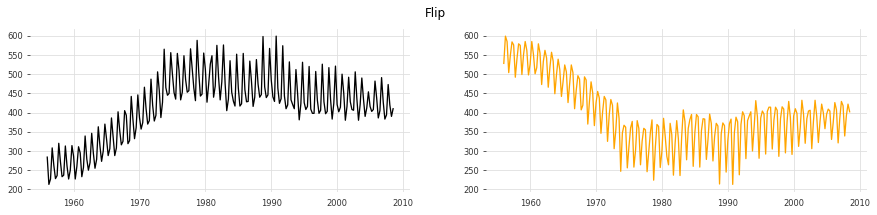

In [10]:
da.plot_augmentation(data,seasonality,"Flip")

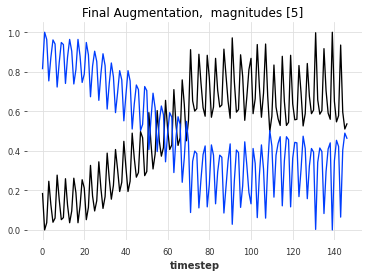

2022-07-27 15:48:12 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:48:12 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:48:12 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:48:12 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:48:12 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:48:12 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 128.75it/s, loss=0.00288, train_loss=0.00266]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


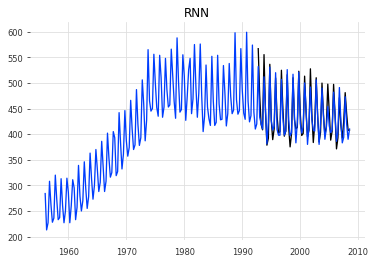

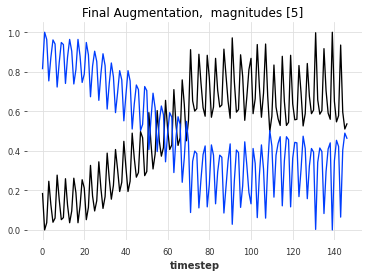

2022-07-27 15:48:27 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:48:27 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:48:27 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:48:27 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:48:27 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:48:27 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 38.64it/s, loss=0.00126, train_loss=0.000604] 


2022-07-27 15:49:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


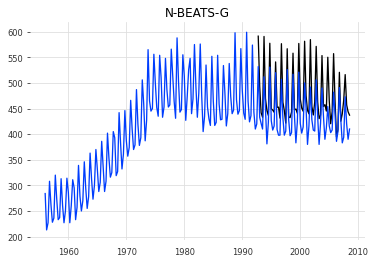

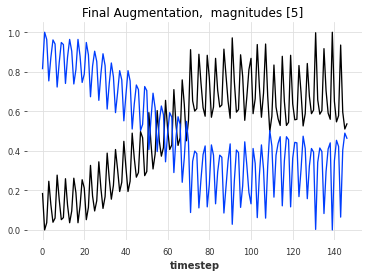

2022-07-27 15:49:21 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:49:21 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:49:21 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:49:21 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:49:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:49:21 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:49:21 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.6 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 91.49it/s, loss=0.00078, train_loss=0.000456] 


2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:49:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


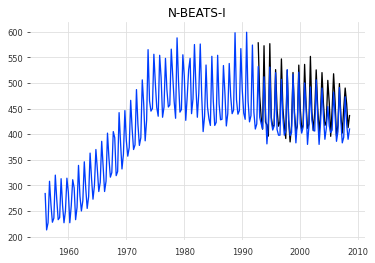

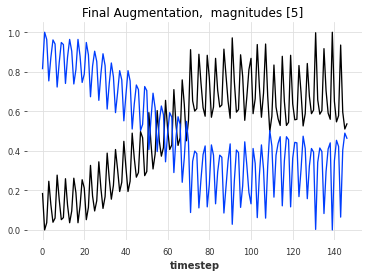

2022-07-27 15:49:45 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:49:45 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:49:45 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:49:45 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:49:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:49:45 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:49:45 pytorch_lightning.callbacks.model_summary INFO: 
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3

Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 66.22it/s, loss=0.00187, train_loss=0.00273] 


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


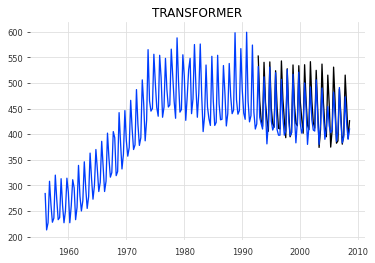

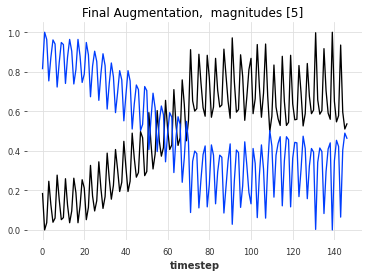

2022-07-27 15:50:14 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-27 15:50:14 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:50:14 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:50:14 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:50:14 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:50:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:50:14 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:50:14 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 128.81it/s, loss=0.0103, train_loss=0.0109]  


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


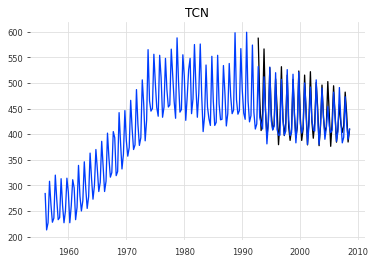

Dataset        Model avg MAPE avg RMSE avg sMAPE std MAPE std RMSE  \
0  AusBeer          RNN    3.041   17.303     3.008      0.0      0.0   
0  AusBeer    N-BEATS-G    9.376   46.424     8.849      0.0      0.0   
0  AusBeer    N-BEATS-I    5.062   26.947     4.898      0.0      0.0   
0  AusBeer  TRANSFORMER    4.776   25.723     4.631      0.0      0.0   
0  AusBeer          TCN    3.159   19.014     3.103      0.0      0.0   

  std sMAPE n ops  mag                                           op prob  
0       0.0     1  [5]  [array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [5]  [array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [5]  [array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [5]  [array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [5]  [array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

In [11]:
aug_n = 1
aug_m = [5]
aug_p = [(np.array(list(da.ranges.keys()))=='Flip').astype(int)]
flip_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed=seed)
flip_results

# Trend Scale

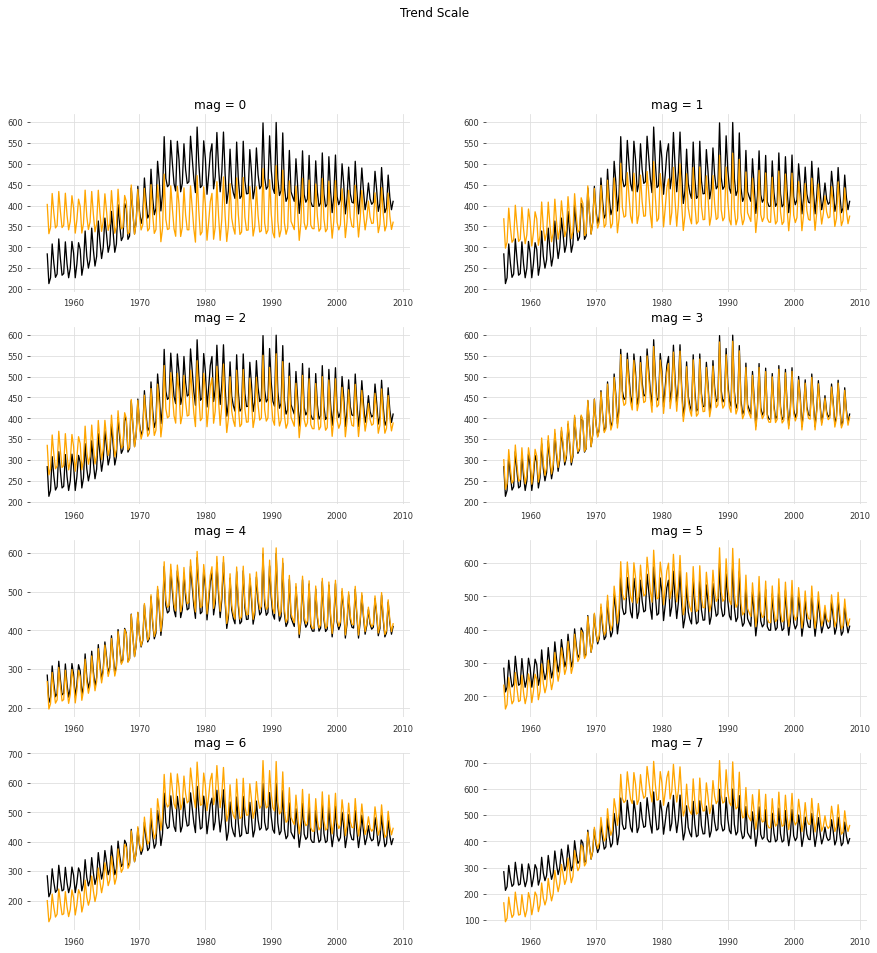

In [12]:
da.plot_augmentation(data,seasonality,"Trend Scale")

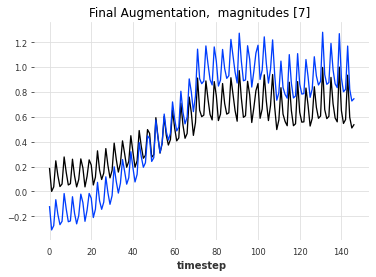

2022-07-27 15:50:31 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:50:31 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:50:31 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:50:31 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:50:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:50:31 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:50:31 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 136.50it/s, loss=0.00386, train_loss=0.00475] 


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:50:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


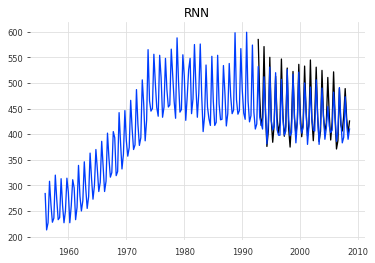

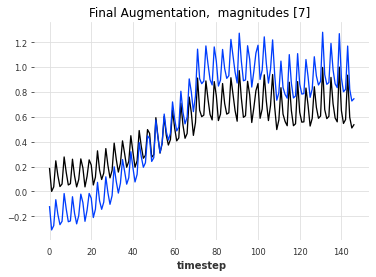

2022-07-27 15:50:46 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:50:46 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:50:46 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:50:46 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:50:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:50:46 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:50:46 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 42.39it/s, loss=0.00111, train_loss=0.000527] 


2022-07-27 15:51:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:51:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:51:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:51:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:51:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:51:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:51:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:51:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


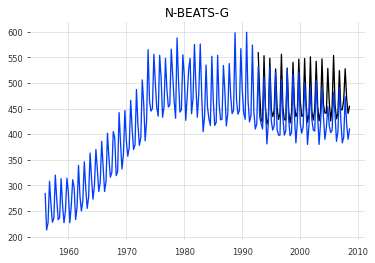

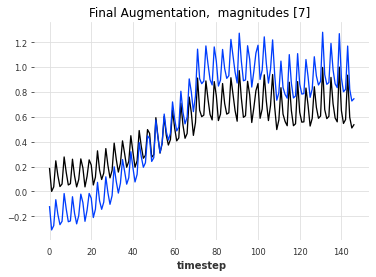

2022-07-27 15:51:39 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:51:39 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:51:39 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:51:39 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:51:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:51:39 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:51:39 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.6 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 94.43it/s, loss=0.00105, train_loss=0.00085]  


2022-07-27 15:51:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:51:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


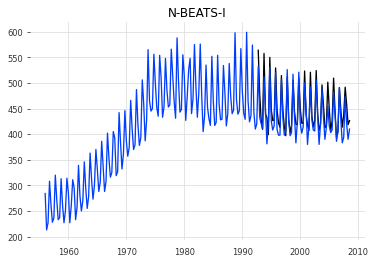

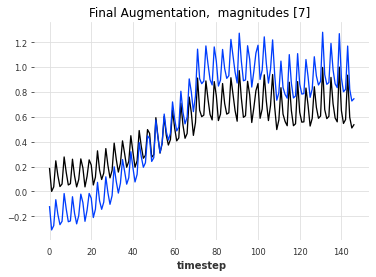

2022-07-27 15:52:02 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:52:02 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:52:02 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:52:02 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:52:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:52:02 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:52:02 pytorch_lightning.callbacks.model_summary INFO: 
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3

Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 66.11it/s, loss=0.00217, train_loss=0.00484] 


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


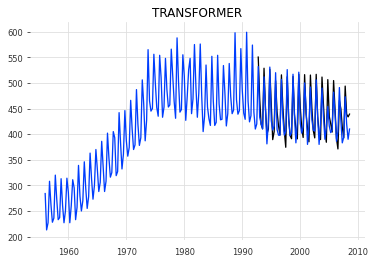

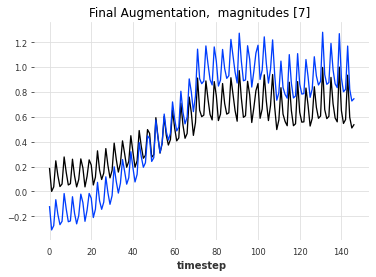

2022-07-27 15:52:32 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-27 15:52:32 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 15:52:32 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 15:52:32 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 15:52:32 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 15:52:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 15:52:32 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 15:52:32 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 123.34it/s, loss=0.0117, train_loss=0.00919]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 15:52:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


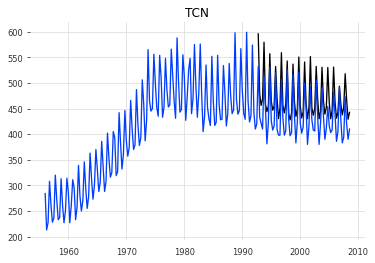

Dataset        Model avg MAPE avg RMSE avg sMAPE std MAPE std RMSE  \
0  AusBeer          RNN    3.901     22.4     3.815      0.0      0.0   
0  AusBeer    N-BEATS-G    7.839    37.61      7.47      0.0      0.0   
0  AusBeer    N-BEATS-I    4.333   22.638     4.206      0.0      0.0   
0  AusBeer  TRANSFORMER    4.168   21.346      4.12      0.0      0.0   
0  AusBeer          TCN     8.91    40.89     8.472      0.0      0.0   

  std sMAPE n ops  mag                                           op prob  
0       0.0     1  [7]  [array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [7]  [array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [7]  [array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [7]  [array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [7]  [array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

In [13]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='Trend Scale').astype(int)]
trend_scale_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
trend_scale_results

# Permutation

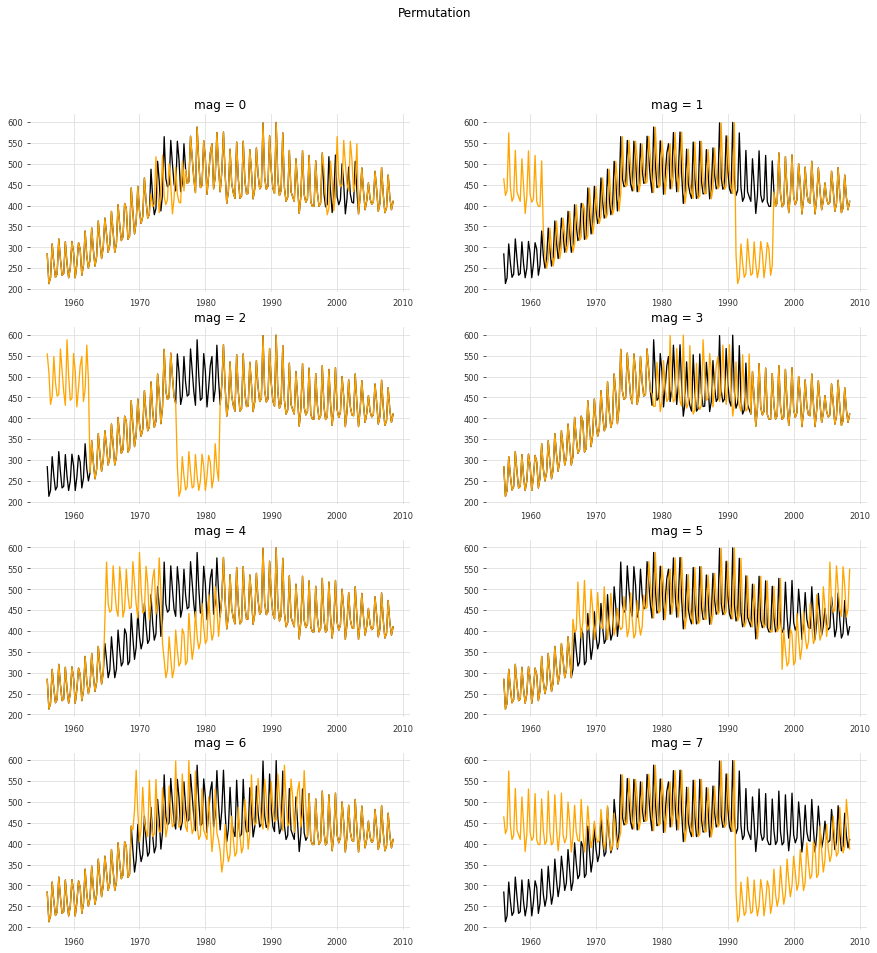

In [14]:
da.plot_augmentation(data,seasonality,"Permutation")

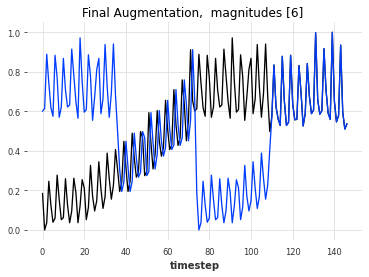

2022-07-27 16:08:11 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:08:11 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:08:11 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:08:11 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:08:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:08:11 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:08:11 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 142.63it/s, loss=0.0103, train_loss=0.00264]  


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


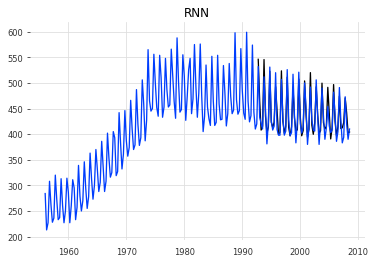

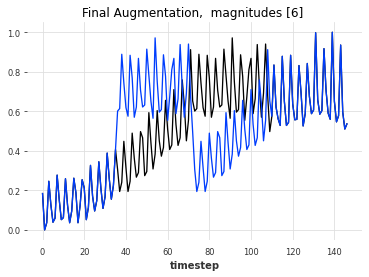

2022-07-27 16:08:26 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:08:26 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:08:26 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:08:26 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:08:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:08:26 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:08:26 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 41.68it/s, loss=0.00186, train_loss=0.000719]


2022-07-27 16:09:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


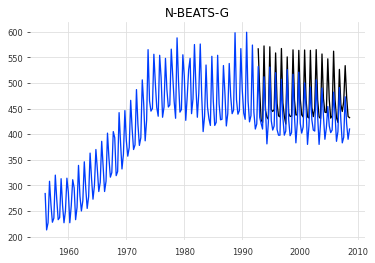

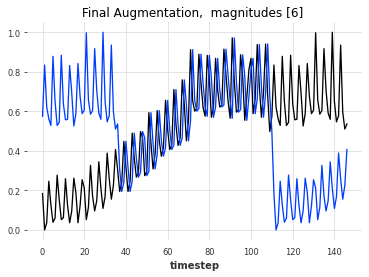

2022-07-27 16:09:18 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:09:18 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:09:18 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:09:18 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:09:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:09:18 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:09:18 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.6 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 91.88it/s, loss=0.00615, train_loss=0.00158] 


2022-07-27 16:09:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:09:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:09:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


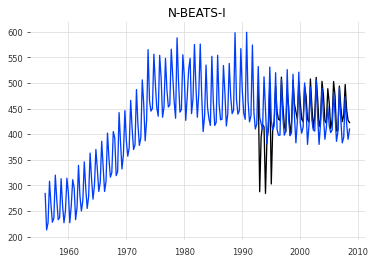

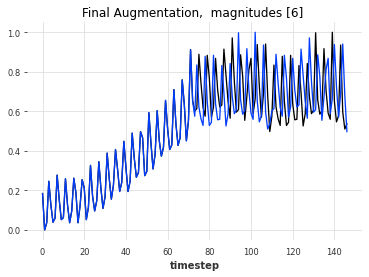

2022-07-27 16:09:41 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:09:41 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:09:41 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:09:41 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:09:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:09:41 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:09:41 pytorch_lightning.callbacks.model_summary INFO: 
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3

Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 63.27it/s, loss=0.00236, train_loss=0.00315] 


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


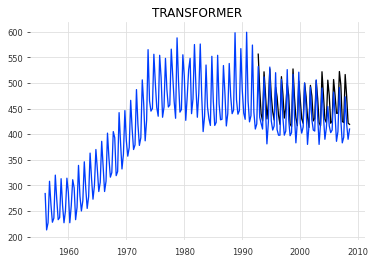

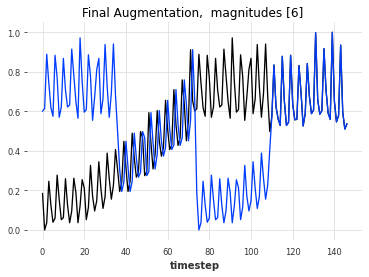

2022-07-27 16:10:11 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-27 16:10:11 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:10:11 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:10:11 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:10:11 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:10:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:10:11 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:10:11 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 106.82it/s, loss=0.0264, train_loss=0.0113] 


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:10:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


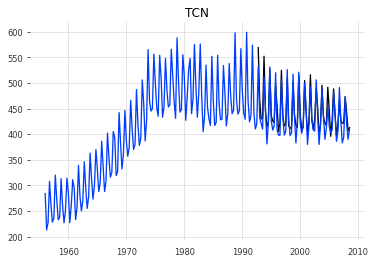

Dataset        Model avg MAPE avg RMSE avg sMAPE std MAPE std RMSE  \
0  AusBeer          RNN    3.164   16.402     3.129      0.0      0.0   
0  AusBeer    N-BEATS-G    8.874   42.946     8.416      0.0      0.0   
0  AusBeer    N-BEATS-I    6.746   42.335     6.948      0.0      0.0   
0  AusBeer  TRANSFORMER    7.108   34.666     6.793      0.0      0.0   
0  AusBeer          TCN    3.518   19.129     3.437      0.0      0.0   

  std sMAPE n ops  mag                                           op prob  
0       0.0     1  [6]  [array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [6]  [array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [6]  [array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [6]  [array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])]  
0       0.0     1  [6]  [array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])]

In [16]:
aug_n = 1
aug_m = [6]
aug_p = [(np.array(list(da.ranges.keys()))=='Permutation').astype(int)]
perm_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
perm_results


# Scale

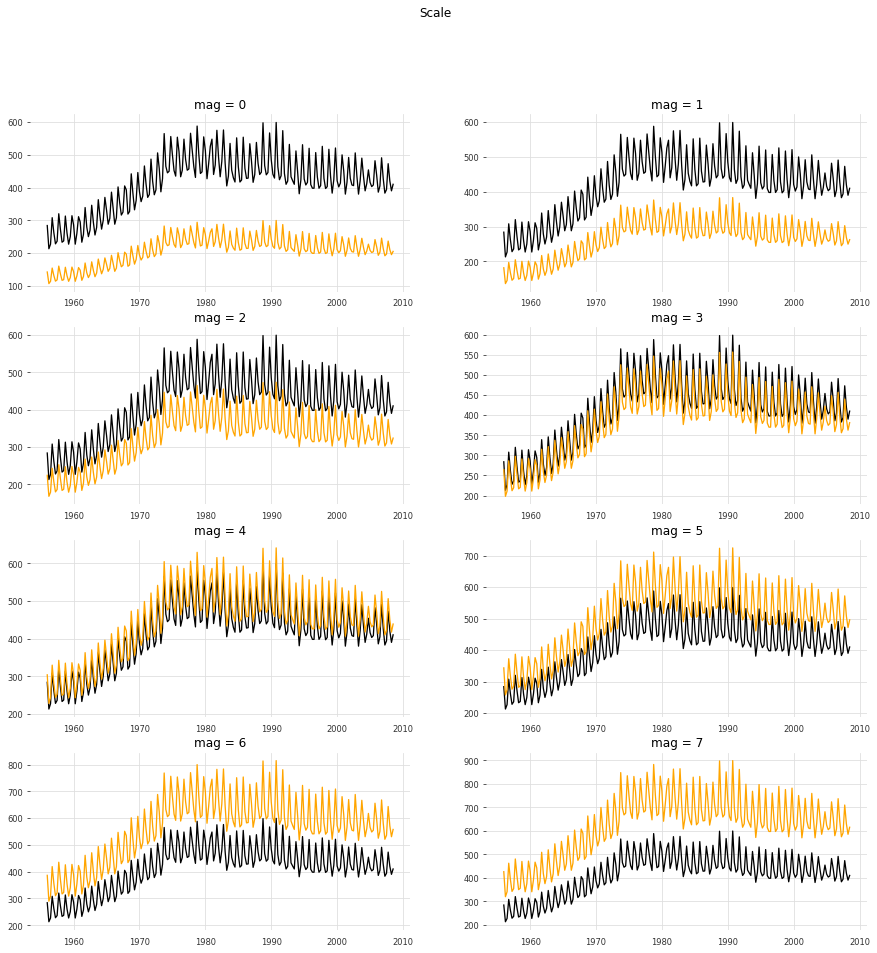

In [17]:
da.plot_augmentation(data,seasonality,"Scale")

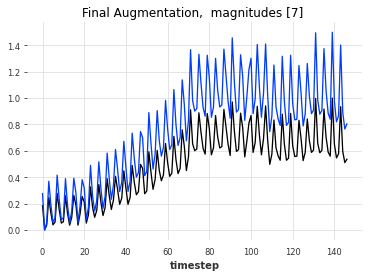

2022-07-27 16:55:57 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:55:57 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:55:57 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:55:57 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:55:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:55:57 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:55:57 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 138.66it/s, loss=0.00322, train_loss=0.00295] 


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:56:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:56:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:56:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:56:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:56:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:56:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:56:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-27 16:56:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:56:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:56:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-27 16:56:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-27 16:56:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


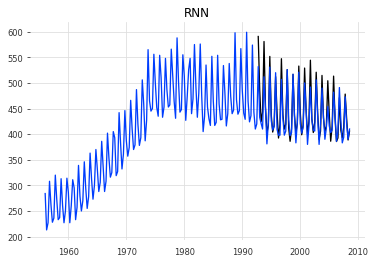

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='Scale').astype(int)]
scale_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
scale_results

# Reverse

In [ ]:
da.plot_augmentation(data,seasonality,"Reverse")

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='Reverse').astype(int)]
reverse_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
reverse_results

# Smoothing - Temporal Smoothness (Least Squares)

In [ ]:
da.plot_augmentation(data,seasonality,"Smooth LS")

In [ ]:
aug_n = 1
aug_m = [4]
aug_p = [(np.array(list(da.ranges.keys()))=='Smooth LS').astype(int)]
ls_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
ls_results

# Smoothing ETS

In [ ]:
da.plot_augmentation(data,seasonality,"Smooth ETS")

In [ ]:
aug_n = 1
aug_m = [4]
aug_p = [(np.array(list(da.ranges.keys()))=='Smooth ETS').astype(int)]
ets_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
ets_results

# MBB

In [ ]:
da.plot_augmentation(data,seasonality,"MBB")

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='MBB').astype(int)]
mbb_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
mbb_results

# Gaussian time warping

In [ ]:

da.plot_augmentation(data,seasonality,"Gaussian TW")

In [ ]:
aug_n = 1
aug_m = [2]
aug_p = [(np.array(list(da.ranges.keys()))=='Gaussian TW').astype(int)]
gtw_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
gtw_results

# Dynamic Time Stretching

In [ ]:
da.plot_augmentation(data,seasonality,"DTS")

In [ ]:
aug_n = 1
aug_m = [6]
aug_p = [(np.array(list(da.ranges.keys()))=='DTS').astype(int)]
dts_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
dts_results

# Window Warping

In [ ]:
da.plot_augmentation(data,seasonality,"Window Warping")

In [ ]:
aug_n = 1
aug_m = [5]
aug_p = [(np.array(list(da.ranges.keys()))=='DTS').astype(int)]
ww_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
ww_results

# Save results

In [ ]:
results = []
results.append(dts_results)
results.append(gtw_results)
results.append(mbb_results)
results.append(ets_results)
results.append(ls_results)
results.append(reverse_results)
results.append(scale_results)
results.append(perm_results)
results.append(trend_scale_results)
results.append(flip_results)
results.append(jitter_results)
results.append(iden_results)
results.append(baseline_result)
results.append(ww_results)

aug_results = pd.concat(results)
aug_results['seed']  = seed

In [ ]:
aug_results.to_excel(datasets[0]+"/seed_"+str(seed)+"_aug_results1.xlsx")

In [ ]:
seed